# 필수 라이브러리 임포트

In [1]:
# 필수 라이브러리 
!pip install --upgrade joblib==1.1.0
!pip install --upgrade scikit-learn==1.1.3
!pip install mglearn

# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 4.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2

In [2]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [3]:
import mglearn

from sklearn.model_selection import train_test_split 

colab 한글 깨짐 방지

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.font_manager as fm
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 분류 모델

## 분류의 선형 모델
> 분류형 선형 모델에서는 경정 경계가 입력의 선형 함수입니다. 다른 말로하면 이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다.  

### 로지스틱 회귀(Logsitic Regression)

- 예측 결정으로 시그모이드 함수 사용
- 시그모이드함수
  - 입력값이 양수 무한대로 입력이 들어가도 1에 가깝게 출력
  - 입력값이 음수 무한대로 입력이 들어가도 0에 가깝게 출력  

  
$$
sigmoid(x) = { 1 \over 1 + e^{-x} }
$$

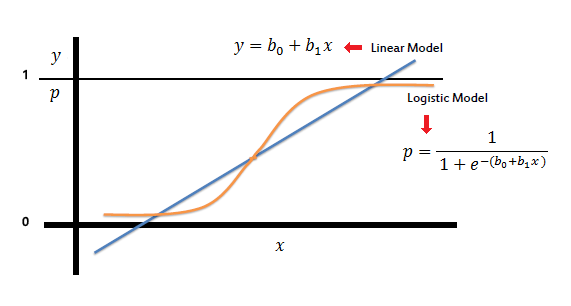

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [7]:
logreg = LogisticRegression().fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg.score(X_te, y_te)}')

훈련용 평가지표: 0.9460093896713615 / 테스트용 평가지표: 0.958041958041958


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표와 테스트용 평가지표가 비슷하게 나왔다. 이는 과소적합. 즉, 훈련이 덜되었다고 해석할 수 있다.    
  
하이퍼파리미터 C는 정규화(L2 규제)를 조절하는 값이다. 해당 값은 꼭 양의 실수값이어야 한다.   
하이퍼파리미터 C이 낮을 수록 계수를 0으로 근사하므로 정규화가 강화된다고 해석할 수 있습니다.

In [8]:
logreg100 = LogisticRegression(C=100).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg100.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg100.score(X_te, y_te)}')

훈련용 평가지표: 0.9436619718309859 / 테스트용 평가지표: 0.958041958041958


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
logreg001 = LogisticRegression(C=0.01).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg001.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg001.score(X_te, y_te)}')

훈련용 평가지표: 0.9342723004694836 / 테스트용 평가지표: 0.9300699300699301


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, *

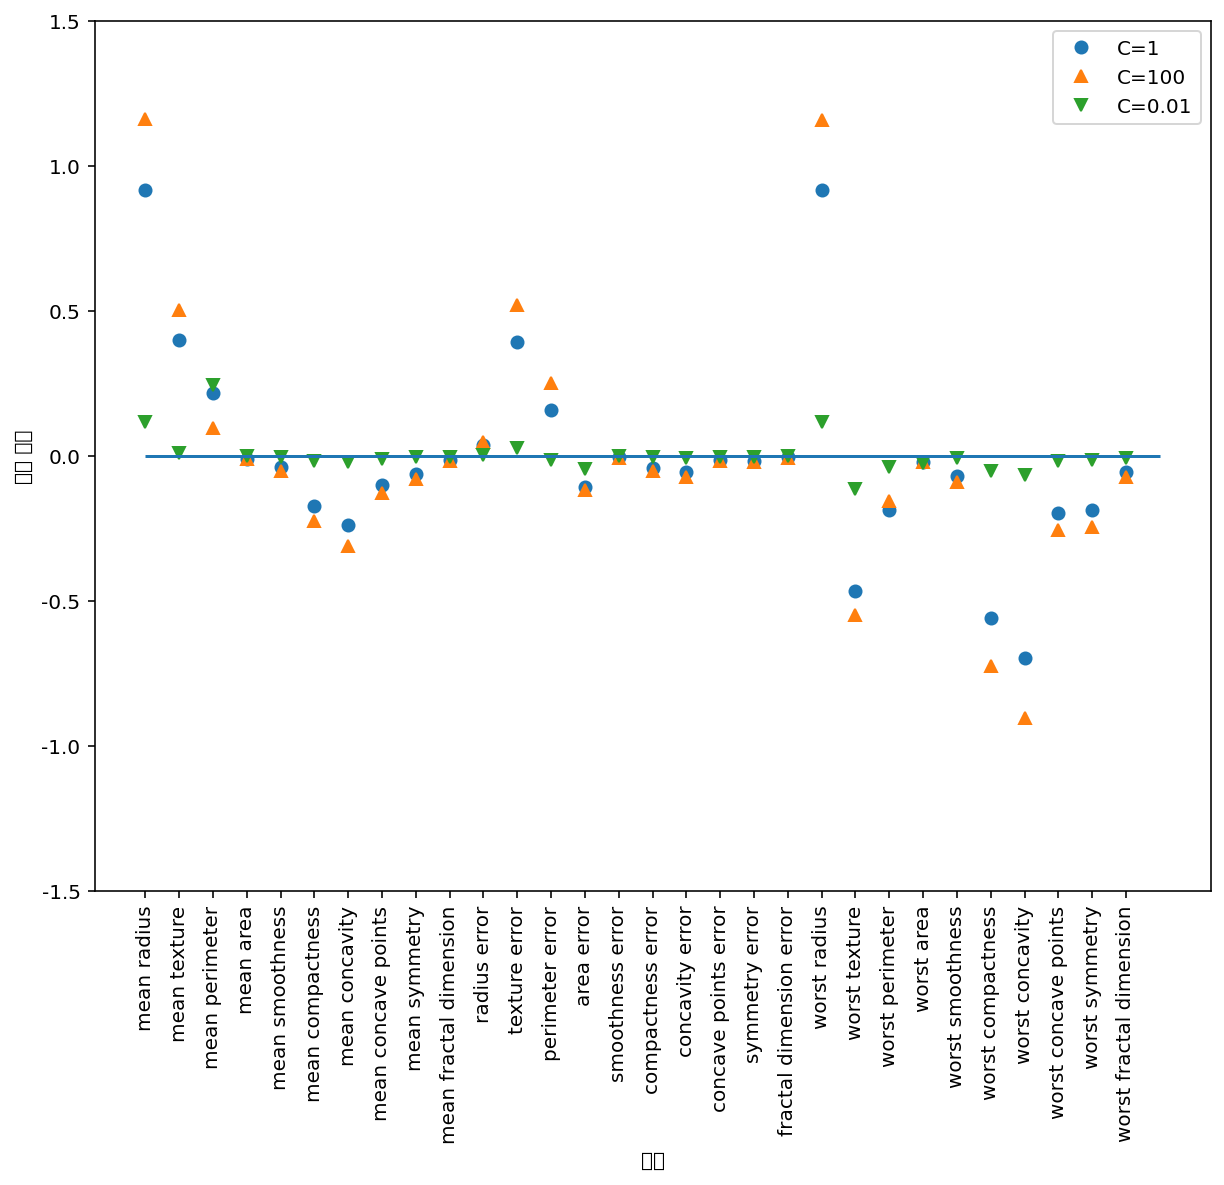

In [10]:
plt.figure(figsize=(10,8))

plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])  
plt.ylim(-1.5,1.5) 
plt.xlabel("특성")  
plt.ylabel("계수 크기")   
plt.legend()

### 선형 서포트벡터 머신(Linear SVM)
- SVM은 클래스를 구분하는 분류 문제에서 각 클래스를 잘 구분하는 선을 그어주는 방식이다.  
- 두 클래스의 가운데 선을 그어주게될 때, 가장 가까이 있는 점들을 Support Vector라고 하며, 찾은 직선과 서포트벡터 사이의 거리를 최대 마진(margin)이라고 한다.   
- 결구 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.

선형 서포트벡터 머신모델 역시, 하이퍼파리미터 C이 낮을 수록 계수를 0으로 근사하므로 정규화가 강화된다고 해석할 수 있습니다.

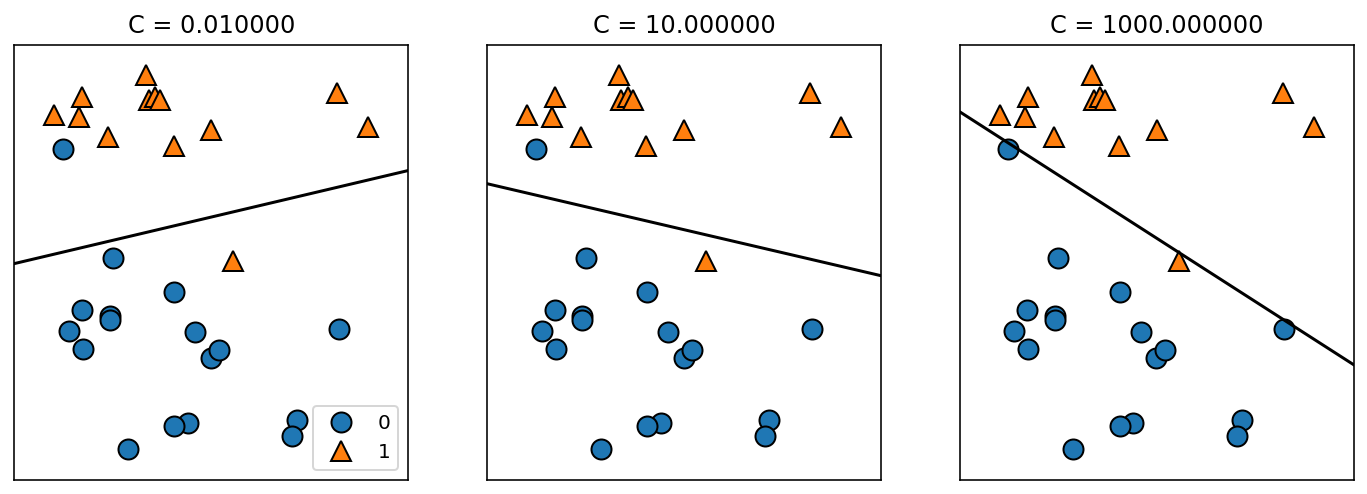

In [11]:
mglearn.plots.plot_linear_svc_regularization()

In [12]:
from sklearn.svm import LinearSVC

In [13]:
lsvc = LinearSVC().fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lsvc.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc.score(X_te, y_te)}')

훈련용 평가지표: 0.7793427230046949 / 테스트용 평가지표: 0.8251748251748252


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
lsvc100 = LinearSVC(C=1000).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lsvc100.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc100.score(X_te, y_te)}')

훈련용 평가지표: 0.9295774647887324 / 테스트용 평가지표: 0.9440559440559441


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
lsvc001 = LinearSVC(C=0.001).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lsvc001.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc001.score(X_te, y_te)}')

훈련용 평가지표: 0.9366197183098591 / 테스트용 평가지표: 0.9370629370629371


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, *

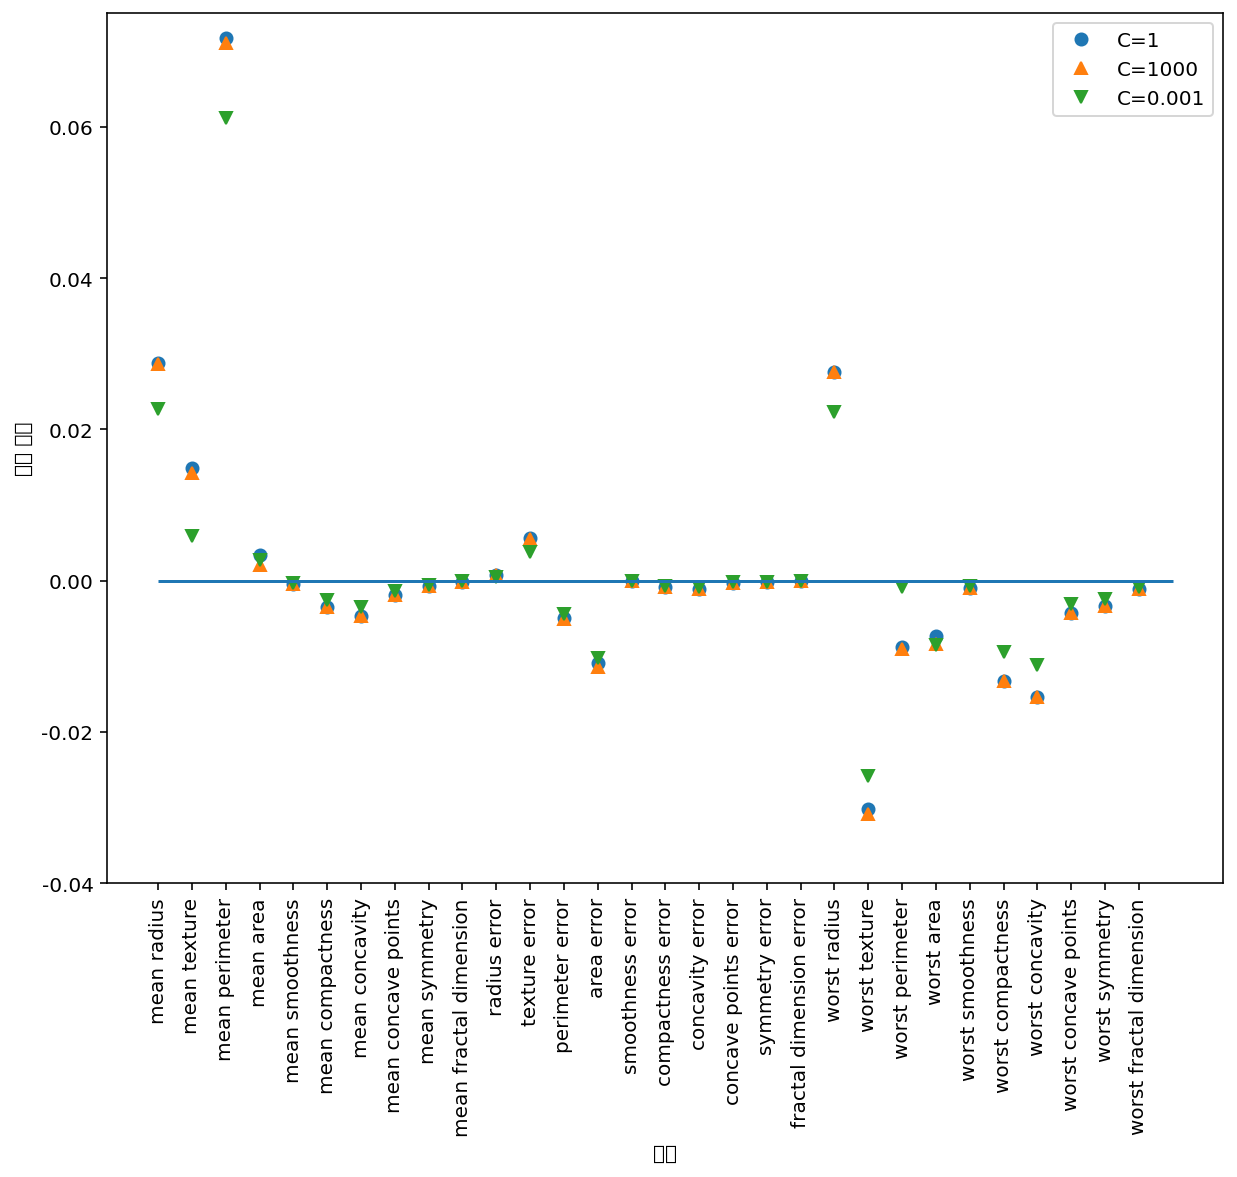

In [16]:
plt.figure(figsize=(10,8))

plt.plot(lsvc.coef_.T, 'o', label='C=1')
plt.plot(lsvc100.coef_.T, '^', label='C=1000')
plt.plot(lsvc001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])  
plt.ylim(-0.04,0.075) 
plt.xlabel("특성")  
plt.ylabel("계수 크기")   
plt.legend() 

## 의사결정나무(Decision Tree)

- 회귀,분류 둘다 사용 가능한 알고리즘
- 여러가지 규칙을 순차적으로 적용하면서 트리기반의 규칙을 만들어 예측하는 알고리즘
- 데이터를 분할 하는데 순수도가 높은 방향으로 규칙을 정한다.
- 순수도
    - 각 노드의 규칙에 의해 동일한 클래스가 포함되는 정도를 의미
    - 부모노드의 순수도에 비해 자식노드들에 순수도가 증가하도록 트리를 형성
- 순수도 척도
    - entropy: 엔트로피는 데이터의 혼자도를 의미한다. 엔트로피값이 0이 될때까지 계층이 만들어진다.
    - gini: gini(불평등지수) 값이 0이면 평등하다는 것을(분류가 잘됐다). 뜻한다. 이 값 역시 0이 될때까지 계층이 만들어진다.
    - gini, entropy값이 0에 가까울 수록 순수도가 높다는 뜻이다.

- root node: 최상단에 위치한 노드(시작점)
- leaf node: 더 이상의 규칙을 정할 수 없는 노드(결정된 클래스 값)
- max nodes: gini/entropy값이 0이 되지 않더라도, max nodes 값 이상으로 노드를 만들지 않음
- min samples split: 해당 노드가 가지고 있는 최소한의 샘플의 개수를 나타낸다.
- min sample leaf: 또 다른 노드를 만들 수 있는 최소한의 샘플 수 조건을 뜻한다. 

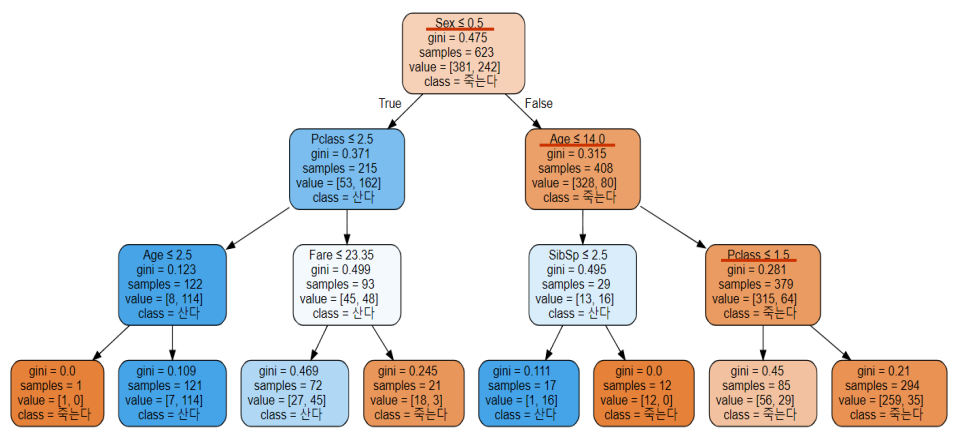

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [19]:
tree = DecisionTreeClassifier(random_state=0).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {tree.score(X_tr, y_tr)} / 테스트용 평가지표: {tree.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.9370629370629371


결정 트리의 깊이 등 하이퍼파라미터를 변경하지 않아 과적합이 발생하였다.(훈련용 평가지표 1.0)

In [20]:
hp = {
    "random_state":42,
    "max_depth":4 ,# 최대 깊이
    "min_samples_split":2, # 노드를 분할하는데 필요한 최소한의 샘플수
    "criterion" : "entropy", # 순수도 척도
    "max_leaf_nodes" : 10, # 최대리프노드수, 과적합 방지
    "min_samples_leaf" : 20, # 리프노드에 있어야할 최소 샘플수
}

tree = DecisionTreeClassifier(**hp).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {tree.score(X_tr, y_tr)} / 테스트용 평가지표: {tree.score(X_te, y_te)}')

훈련용 평가지표: 0.9460093896713615 / 테스트용 평가지표: 0.916083916083916


각 특성(피쳐)들의 중요도 확인

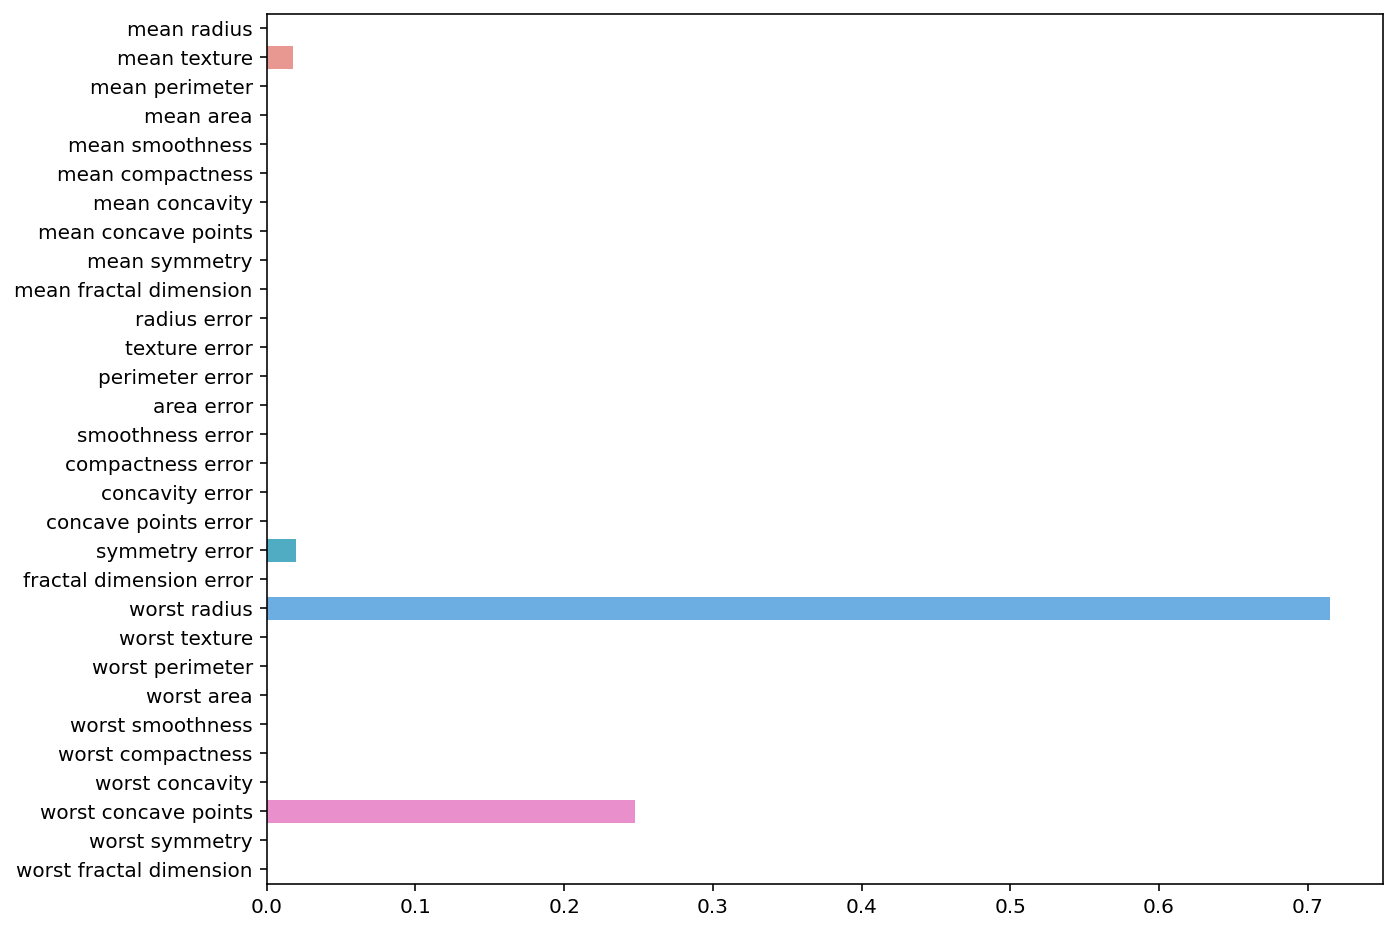

In [21]:
plt.figure(figsize=(10,8))

sns.barplot(x=tree.feature_importances_,y=cancer.feature_names)
plt.show()

In [22]:
from sklearn.tree import export_graphviz 

export_graphviz(
    tree, out_file="tree.dot", class_names=["악성", "양성"], 
    feature_names=cancer.feature_names, impurity=False, filled=True)

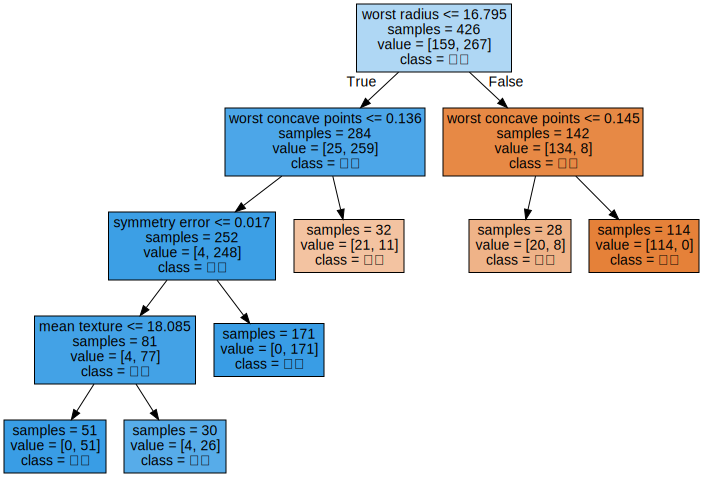

In [23]:
import graphviz 

with open("tree.dot") as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

## k-최근접 이웃(K-NN)

- 최근접 이웃 알고리즘
- 새로운 샘플이 K개의 가까운 이웃을 이용해서 예측
- 제일 가까운 데이터 포인트를 찾아서 결정하는 방식
- 회귀, 분류 둘다 사용한 알고리즘

> 데이터 포인트간의 거리를 측정하는 방법

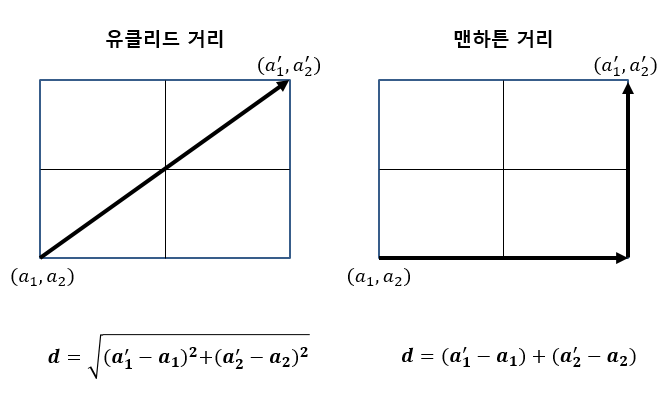

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


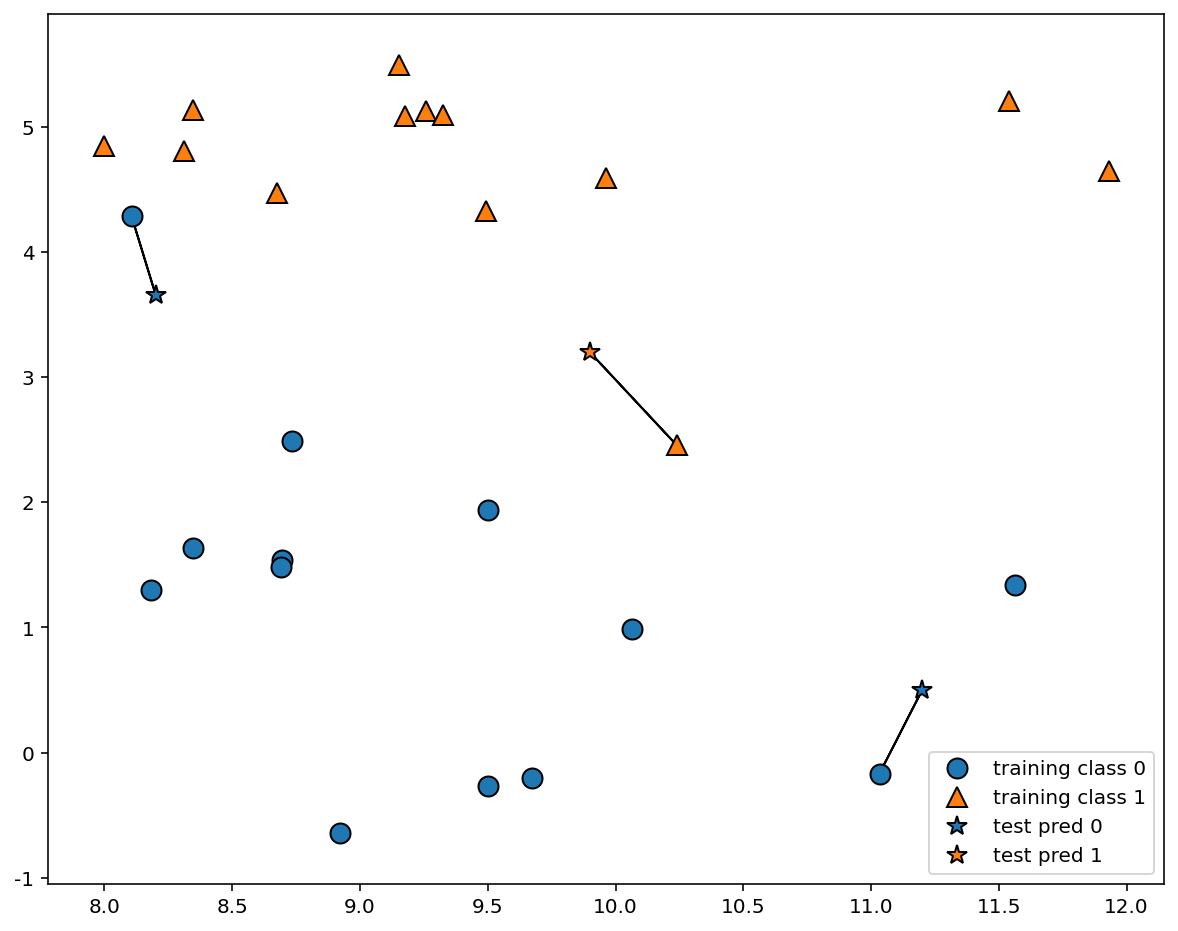

In [24]:
plt.figure(figsize=(10,8))

mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


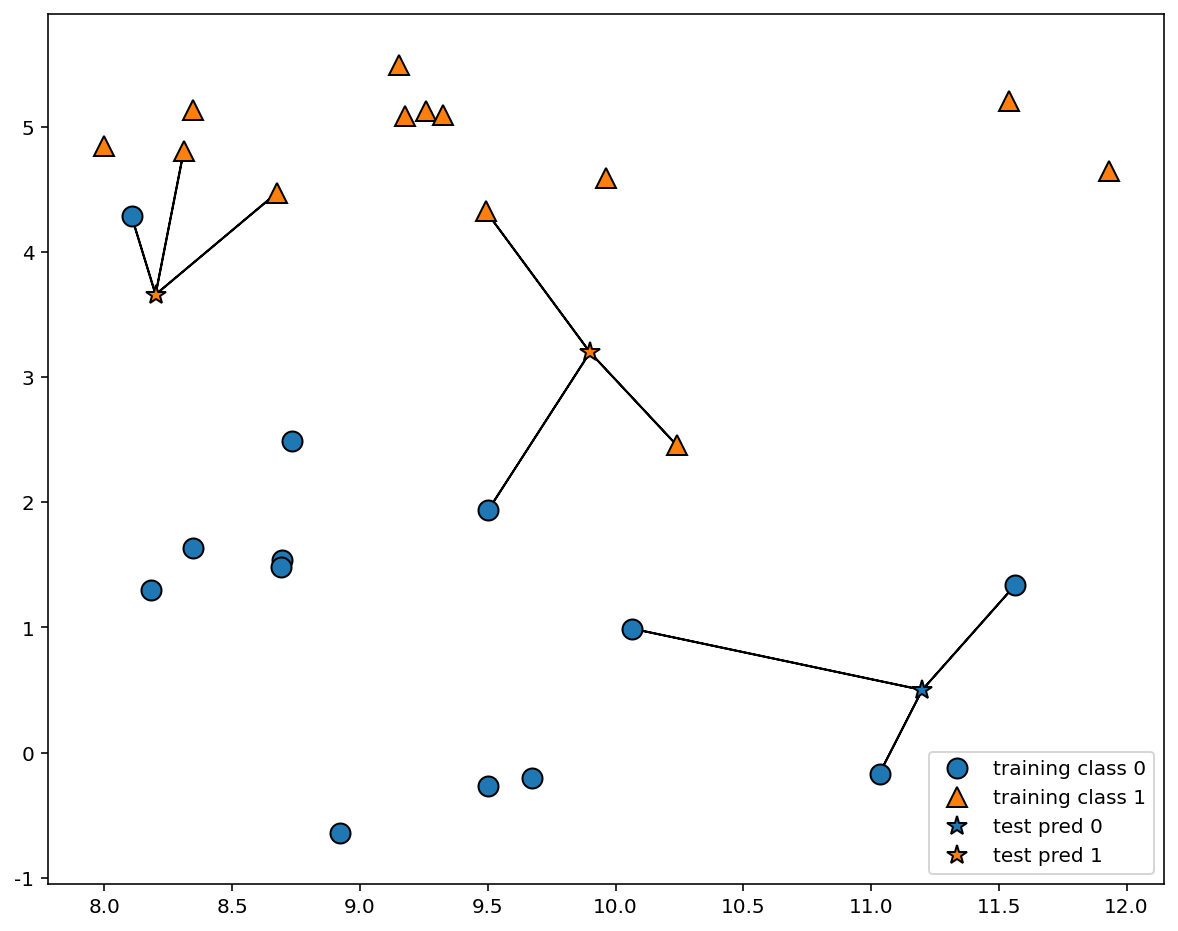

In [25]:
plt.figure(figsize=(10,8))

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsClassifier 

In [27]:
X, y = mglearn.datasets.make_forge() 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [28]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {clf.score(X_tr, y_tr)} / 테스트용 평가지표: {clf.score(X_te, y_te)}')

훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571


In [29]:
for neighbor in [1, 2, 3, 4, 5, 6, 7, 8]:
  clf = KNeighborsClassifier(n_neighbors=neighbor).fit(X_tr, y_tr) 
  print(f'neighbor: {neighbor}')
  print(f'훈련용 평가지표: {clf.score(X_tr, y_tr)} / 테스트용 평가지표: {clf.score(X_te, y_te)}')

neighbor: 1
훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.8571428571428571
neighbor: 2
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 3
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 4
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 5
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 6
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 7
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 8
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
